# Face detection with Edge TPU

Performing face detection is similar to classification. However, a bit more work is needed to decode the predictions. 

Again, we will start with a pretrained model to keep things simple.

In [1]:
!wget http://storage.googleapis.com/cloud-iot-edge-pretrained-models/canned_models/mobilenet_ssd_v2_face_quant_postprocess_edgetpu.tflite -P data

--2019-05-06 11:29:52--  http://storage.googleapis.com/cloud-iot-edge-pretrained-models/canned_models/mobilenet_ssd_v2_face_quant_postprocess_edgetpu.tflite
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.16.144, 2a00:1450:401b:805::2010
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.16.144|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6706184 (6,4M) [application/octet-stream]
Saving to: ‘data/mobilenet_ssd_v2_face_quant_postprocess_edgetpu.tflite’

mobilenet_ssd_v2_fa 100%[===================>]   6,40M  17,8MB/s    in 0,4s    

2019-05-06 11:29:53 (17,8 MB/s) - ‘data/mobilenet_ssd_v2_face_quant_postprocess_edgetpu.tflite’ saved [6706184/6706184]



Also, get a sample image:

In [2]:
!wget https://coral.withgoogle.com/static/images/face.jpg -P data

--2019-05-06 11:29:55--  https://coral.withgoogle.com/static/images/face.jpg
Resolving coral.withgoogle.com (coral.withgoogle.com)... 172.217.21.241, 2a00:1450:4001:819::2011
Connecting to coral.withgoogle.com (coral.withgoogle.com)|172.217.21.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 150709 (147K) [image/jpeg]
Saving to: ‘data/face.jpg’

face.jpg            100%[===================>] 147,18K  --.-KB/s    in 0,1s    

2019-05-06 11:29:56 (1,14 MB/s) - ‘data/face.jpg’ saved [150709/150709]



Set up the detection engine (be sure to have your TPU already plugged in)!

In [3]:
from edgetpu.detection.engine import DetectionEngine
engine = DetectionEngine('data/mobilenet_ssd_v2_face_quant_postprocess_edgetpu.tflite')

Let's perform face detection!

In [4]:
from PIL import Image
from PIL import ImageDraw

img = Image.open('data/face.jpg')
draw = ImageDraw.Draw(img)

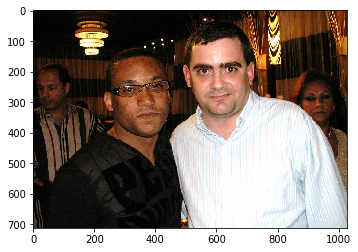

In [5]:
from matplotlib.pyplot import imshow
%matplotlib inline
import numpy as np

imshow(np.asarray(img))

Run inference:

In [6]:
results = engine.DetectWithImage(img, threshold=0.1, keep_aspect_ratio=True, relative_coord=False, top_k=10)

Annotate the image:

In [7]:
if results:
    for obj in results:
        box = obj.bounding_box.flatten().tolist()
        print ('Face with score = ', obj.score, " found at ", box)
        draw.rectangle(box, outline='red', width=4)

Face with score =  0.99609375  found at  [474.22854804992676, 38.03488787482766, 738.8013491630554, 353.5309683683231]
Face with score =  0.99609375  found at  [205.4297697544098, 110.28378465056959, 487.75309658050537, 439.73802454331343]
Face with score =  0.83203125  found at  [7.522284880280495, 183.90177454883695, 125.84126299619675, 324.99404113217173]
Face with score =  0.5  found at  [859.8422718048096, 213.5472493581642, 1008.978108882904, 383.9367261515483]


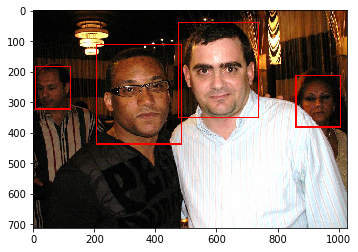

In [8]:
imshow(np.asarray(img))